In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
from utils import plot_spin_qfunc, plot_S_measure

# Qubit

In [3]:
N = 2 # Qubits are two-level systems

In [4]:
def get_disipators(gain_amp, loss_amp):
    return (0.5 * gain_amp * lindblad_dissipator(sigmap()),
            0.5 * loss_amp * lindblad_dissipator(sigmam()))

In [5]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(-np.pi, np.pi, 200)

## Steady States
### Rotating Frame $H=0$

In [6]:
gain, loss = get_disipators(10, 1)
H0 = Qobj(np.zeros([N, N]))
sstate = steadystate(H0, [gain, loss])
sstate

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.90909091 0.        ]
 [0.         0.09090909]]

In [7]:
# b = Bloch3d()
# b.add_states([0.5*basis(2) + 0.5*basis(2, 1)])
# b.show()

In [8]:
# plot_spin_qfunc(sstate, theta, phi)

### Signal $H = \frac12(\Delta\sigma_z + \epsilon\sigma_y)$

In [9]:
def signal_hamiltonian(detuning, signal_strength):
    return 0.5 * (detuning*sigmaz() + signal_strength*sigmay())

In [17]:
gain_amp = 10
loss_amp = 1

gain, loss = get_disipators(gain_amp, loss_amp)

detuning = 0
signal_strength = 2 * min(gain_amp, loss_amp)
H = signal_hamiltonian(detuning, signal_strength)
signal_sstate = steadystate(H, [gain, loss])
signal_sstate

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.82352941 0.23529412]
 [0.23529412 0.17647059]]

(array([[0.05617233, 0.05384787, 0.05162944, ..., 0.25717999, 0.2597094 ,
         0.26213755],
        [0.05617233, 0.05384906, 0.05163181, ..., 0.25718236, 0.25971058,
         0.26213755],
        [0.05617233, 0.05385261, 0.05163891, ..., 0.25718946, 0.25971413,
         0.26213755],
        ...,
        [0.05617233, 0.05385261, 0.05163891, ..., 0.25718946, 0.25971413,
         0.26213755],
        [0.05617233, 0.05384906, 0.05163181, ..., 0.25718236, 0.25971058,
         0.26213755],
        [0.05617233, 0.05384787, 0.05162944, ..., 0.25717999, 0.2597094 ,
         0.26213755]]),
 (<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
  <matplotlib.collections.QuadMesh at 0x1f67923e4c0>))

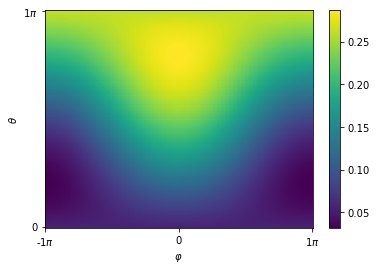

In [18]:
plot_spin_qfunc(signal_sstate, theta, phi)

In [19]:
gain_amp = 0.1
loss_amp = 1

gain, loss = get_disipators(gain_amp, loss_amp)

m = min(gain_amp, loss_amp)
detuning = 3 * m
signal_strength = 2 * m
H = signal_hamiltonian(detuning, signal_strength)
detuned_signal_sstate = steadystate(H, [gain, loss])
detuned_signal_sstate

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.13498623+0.j        -0.12121212+0.1322314j]
 [-0.12121212-0.1322314j  0.86501377+0.j       ]]

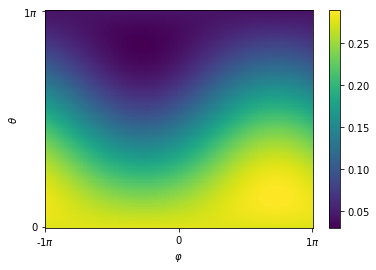

In [13]:
Q, *_ = plot_spin_qfunc(detuned_signal_sstate, theta, phi)

### Synchronisation Measure $S(\varphi|\rho) = \int_0^\pi\mathrm d\theta\sin\theta Q(\theta, \varphi|\rho) - \frac{1}{2\pi}$

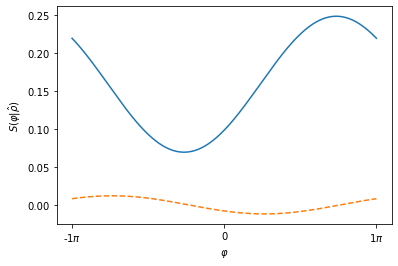

In [14]:
fig, ax = plt.subplots()

plot_S_measure(Q, theta, phi, ax=ax, fig=fig)

# Stationary solutions for the Bloch vector components for the driven case 
mx = 4*signal_strength*(gain_amp-loss_amp) / ((gain_amp+loss_amp)**2 + 8*(signal_strength**2 + 2*detuning*2))
my = mx * 4*detuning / (gain_amp+loss_amp)

S_analytic = (1/8)*(mx*np.cos(phi) + my*np.sin(phi))

ax.plot(phi, S_analytic, ls="--")